# Robustness checks: vary number of neighbors and starting conditions

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import rc
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy import stats
import seaborn as sn

In [2]:
os.chdir('/Users/johannes/GitHub/Income_Tax_Return_Disclosure')

Note: simulations are carried out using TRDisclosure-vary-initial-state.py and TRDisclosure-vary-neighbors.py, respectively. This worksheet only imports the results and generates figures.

## Number of neighbors

In [3]:
scen11_df = pd.read_pickle(os.path.join('2_temp_files', 'modeldata_alt_neighbors_scen1_1.pkl'))
scen12_df = pd.read_pickle(os.path.join('2_temp_files', 'modeldata_alt_neighbors_scen1_2.pkl'))
scen13_df = pd.read_pickle(os.path.join('2_temp_files', 'modeldata_alt_neighbors_scen1_3.pkl'))
scen14_df = pd.read_pickle(os.path.join('2_temp_files', 'modeldata_alt_neighbors_scen1_4.pkl'))
scen15_df = pd.read_pickle(os.path.join('2_temp_files', 'modeldata_alt_neighbors_scen1_5.pkl'))

scen21_df = pd.read_pickle(os.path.join('2_temp_files', 'modeldata_alt_neighbors_scen2_1.pkl'))
scen22_df = pd.read_pickle(os.path.join('2_temp_files', 'modeldata_alt_neighbors_scen2_2.pkl'))
scen23_df = pd.read_pickle(os.path.join('2_temp_files', 'modeldata_alt_neighbors_scen2_3.pkl'))
scen24_df = pd.read_pickle(os.path.join('2_temp_files', 'modeldata_alt_neighbors_scen2_4.pkl'))
scen25_df = pd.read_pickle(os.path.join('2_temp_files', 'modeldata_alt_neighbors_scen2_5.pkl'))

scen31_df = pd.read_pickle(os.path.join('2_temp_files', 'modeldata_alt_neighbors_scen3_1.pkl'))
scen32_df = pd.read_pickle(os.path.join('2_temp_files', 'modeldata_alt_neighbors_scen3_2.pkl'))
scen33_df = pd.read_pickle(os.path.join('2_temp_files', 'modeldata_alt_neighbors_scen3_3.pkl'))
scen34_df = pd.read_pickle(os.path.join('2_temp_files', 'modeldata_alt_neighbors_scen3_4.pkl'))
scen35_df = pd.read_pickle(os.path.join('2_temp_files', 'modeldata_alt_neighbors_scen3_5.pkl'))

scen1_df = scen11_df.append(scen12_df, ignore_index = True)
scen1_df = scen1_df.append(scen13_df, ignore_index = True)
scen1_df = scen1_df.append(scen14_df, ignore_index = True)
scen1_df = scen1_df.append(scen15_df, ignore_index = True)

scen2_df = scen21_df.append(scen22_df, ignore_index = True)
scen2_df = scen2_df.append(scen23_df, ignore_index = True)
scen2_df = scen2_df.append(scen24_df, ignore_index = True)
scen2_df = scen2_df.append(scen25_df, ignore_index = True)

scen3_df = scen31_df.append(scen32_df, ignore_index = True)
scen3_df = scen3_df.append(scen33_df, ignore_index = True)
scen3_df = scen3_df.append(scen34_df, ignore_index = True)
scen3_df = scen3_df.append(scen35_df, ignore_index = True)

globally change font for plots

In [4]:
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)

### Scenario 1

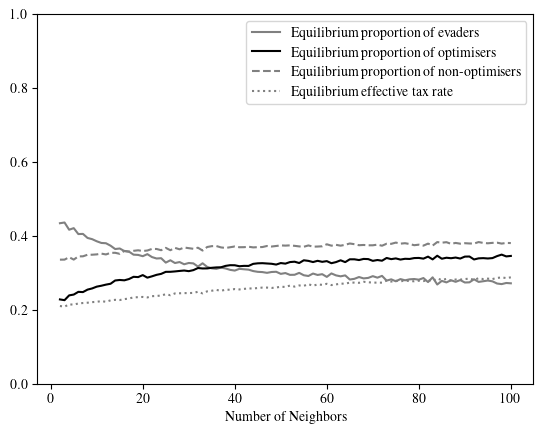

In [5]:
evaderlist = []
avoiderlist = []
honestlist = []
taxrevlist = []
avoiderlow = []
avoiderhigh = []
nnlist = []
for nn in range(2,101,1):
    evaderlist.append(scen1_df[scen1_df.neighbors==nn]['Number of Evaders'].mean())
    avoiderlist.append(scen1_df[scen1_df.neighbors==nn]['Number of Avoiders'].mean())
    #calculate confidence interval
    a = scen1_df[scen1_df.neighbors==nn]['Number of Avoiders'].to_list()
    avoiderlow.append(sms.DescrStatsW(a).tconfint_mean()[0])
    avoiderhigh.append(sms.DescrStatsW(a).tconfint_mean()[1])
    honestlist.append(scen1_df[scen1_df.neighbors==nn]['Number of Honest'].mean())
    taxrevlist.append(scen1_df[scen1_df.neighbors==nn]['Tax'].mean())
    nnlist.append(nn)

plt.plot(nnlist, evaderlist, color='gray', label='Equilibrium proportion of evaders')
plt.plot(nnlist, avoiderlist, color='black', label='Equilibrium proportion of optimisers')
#plt.plot(nnlist, avoiderlow, color='black', linestyle='dotted')
#plt.plot(nnlist, avoiderhigh, color='black', linestyle='dotted')
plt.plot(nnlist, honestlist, linestyle='dashed', color='gray', label='Equilibrium proportion of non-optimisers')
plt.plot(nnlist, taxrevlist, color='gray', linestyle='dotted', label='Equilibrium effective tax rate')
plt.legend(loc="upper right")
plt.xlabel("Number of Neighbors")
#plt.ylabel("Share")
plt.ylim([0,1])
plt.savefig(os.path.join('3_output', 'robustness_neighbors1.svg'), format = 'svg', dpi=300)

### Scenario 2

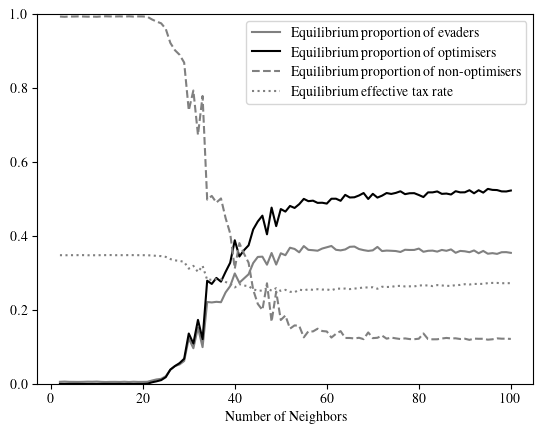

In [6]:
evaderlist = []
avoiderlist = []
honestlist = []
taxrevlist = []
avoiderlow = []
avoiderhigh = []
nnlist = []
for nn in range(2,101,1):
    evaderlist.append(scen2_df[scen2_df.neighbors==nn]['Number of Evaders'].mean())
    avoiderlist.append(scen2_df[scen2_df.neighbors==nn]['Number of Avoiders'].mean())
    #calculate confidence interval
    a = scen2_df[scen2_df.neighbors==nn]['Number of Avoiders'].to_list()
    avoiderlow.append(sms.DescrStatsW(a).tconfint_mean()[0])
    avoiderhigh.append(sms.DescrStatsW(a).tconfint_mean()[1])
    honestlist.append(scen2_df[scen2_df.neighbors==nn]['Number of Honest'].mean())
    taxrevlist.append(scen2_df[scen2_df.neighbors==nn]['Tax'].mean())
    nnlist.append(nn)

plt.plot(nnlist, evaderlist, color='gray', label='Equilibrium proportion of evaders')
plt.plot(nnlist, avoiderlist, color='black', label='Equilibrium proportion of optimisers')
#plt.plot(nnlist, avoiderlow, color='black', linestyle='dotted')
#plt.plot(nnlist, avoiderhigh, color='black', linestyle='dotted')
plt.plot(nnlist, honestlist, linestyle='dashed', color='gray', label='Equilibrium proportion of non-optimisers')
plt.plot(nnlist, taxrevlist, color='gray', linestyle='dotted', label='Equilibrium effective tax rate')
plt.legend(loc="upper right")
plt.xlabel("Number of Neighbors")
#plt.ylabel("Share")
plt.ylim([0,1])
plt.savefig(os.path.join('3_output', 'robustness_neighbors2.svg'), format = 'svg', dpi=300)

### Scenario 3

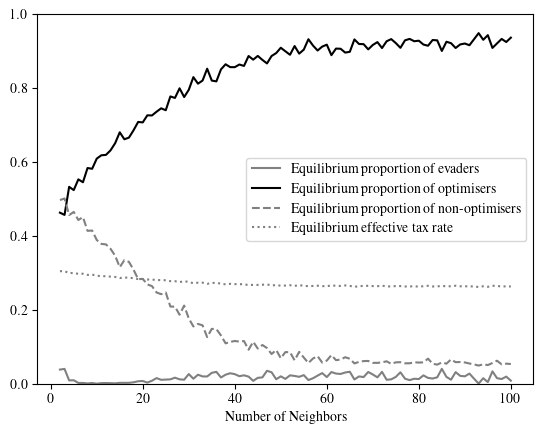

In [7]:
evaderlist = []
avoiderlist = []
avoiderlow = []
avoiderhigh = []
honestlist = []
taxrevlist = []
nnlist = []
for nn in range(2,101,1):
    evaderlist.append(scen3_df[scen3_df.neighbors==nn]['Number of Evaders'].mean())
    avoiderlist.append(scen3_df[scen3_df.neighbors==nn]['Number of Avoiders'].mean())
    #calculate confidence interval
    a = scen3_df[scen3_df.neighbors==nn]['Number of Avoiders'].to_list()
    avoiderlow.append(sms.DescrStatsW(a).tconfint_mean()[0])
    avoiderhigh.append(sms.DescrStatsW(a).tconfint_mean()[1])
    
    honestlist.append(scen3_df[scen3_df.neighbors==nn]['Number of Honest'].mean())
    taxrevlist.append(scen3_df[scen3_df.neighbors==nn]['Tax'].mean())
    nnlist.append(nn)

plt.plot(nnlist, evaderlist, color='gray', label='Equilibrium proportion of evaders')
plt.plot(nnlist, avoiderlist, color='black', label='Equilibrium proportion of optimisers')
#plt.plot(nnlist, avoiderlow, color='black', linestyle='dotted')
#plt.plot(nnlist, avoiderhigh, color='black', linestyle='dotted')
plt.plot(nnlist, honestlist, linestyle='dashed', color='gray', label='Equilibrium proportion of non-optimisers')
plt.plot(nnlist, taxrevlist, color='gray', linestyle='dotted', label='Equilibrium effective tax rate')
plt.legend(loc="center right")
plt.xlabel("Number of Neighbors")
#plt.ylabel("Share")
plt.ylim([0,1])
plt.savefig(os.path.join('3_output', 'robustness_neighbors3.svg'), format = 'svg', dpi=300)

## Starting conditions

In [8]:
nbscen11_df = pd.read_pickle(os.path.join('2_temp_files', 'modeldata_alt_inits_scen1_1.pkl'))
nbscen12_df = pd.read_pickle(os.path.join('2_temp_files', 'modeldata_alt_inits_scen1_2.pkl'))
nbscen13_df = pd.read_pickle(os.path.join('2_temp_files', 'modeldata_alt_inits_scen1_3.pkl'))
nbscen14_df = pd.read_pickle(os.path.join('2_temp_files', 'modeldata_alt_inits_scen1_4.pkl'))

nbscen21_df = pd.read_pickle(os.path.join('2_temp_files', 'modeldata_alt_inits_scen2_1.pkl'))
nbscen22_df = pd.read_pickle(os.path.join('2_temp_files', 'modeldata_alt_inits_scen2_2.pkl'))
nbscen23_df = pd.read_pickle(os.path.join('2_temp_files', 'modeldata_alt_inits_scen2_3.pkl'))
nbscen24_df = pd.read_pickle(os.path.join('2_temp_files', 'modeldata_alt_inits_scen2_4.pkl'))

nbscen31_df = pd.read_pickle(os.path.join('2_temp_files', 'modeldata_alt_inits_scen3_1.pkl'))
nbscen32_df = pd.read_pickle(os.path.join('2_temp_files', 'modeldata_alt_inits_scen3_2.pkl'))
nbscen33_df = pd.read_pickle(os.path.join('2_temp_files', 'modeldata_alt_inits_scen3_3.pkl'))
nbscen34_df = pd.read_pickle(os.path.join('2_temp_files', 'modeldata_alt_inits_scen3_4.pkl'))

nbscen1_df = nbscen11_df.append(nbscen12_df, ignore_index = True)
nbscen1_df = nbscen1_df.append(nbscen13_df, ignore_index = True)
nbscen1_df = nbscen1_df.append(nbscen14_df, ignore_index = True)

nbscen2_df = nbscen21_df.append(nbscen22_df, ignore_index = True)
nbscen2_df = nbscen2_df.append(nbscen23_df, ignore_index = True)
nbscen2_df = nbscen2_df.append(nbscen24_df, ignore_index = True)

nbscen3_df = nbscen31_df.append(nbscen32_df, ignore_index = True)
nbscen3_df = nbscen3_df.append(nbscen33_df, ignore_index = True)
nbscen3_df = nbscen3_df.append(nbscen34_df, ignore_index = True)

### Scenario 1

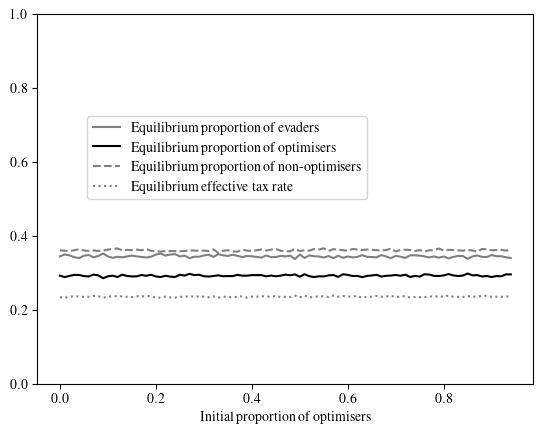

In [9]:
evaderlist = []
avoiderlist = []
honestlist = []
taxrevlist = []
avoiderlow = []
avoiderhigh = []
ialist = []
for ia in np.arange(0,0.95,0.01):
    evaderlist.append(nbscen1_df[(nbscen1_df.initial_avoider >= ia) & (nbscen1_df.initial_avoider < ia + 0.01)]['Number of Evaders'].mean())
    avoiderlist.append(nbscen1_df[(nbscen1_df.initial_avoider >= ia) & (nbscen1_df.initial_avoider < ia + 0.01)]['Number of Avoiders'].mean())
    #calculate confidence interval
    a = nbscen1_df[(nbscen1_df.initial_avoider >= ia) & (nbscen1_df.initial_avoider < ia + 0.01)]['Number of Avoiders'].to_list()
    #avoiderlow.append(sms.DescrStatsW(a).tconfint_mean()[0])
    #avoiderhigh.append(sms.DescrStatsW(a).tconfint_mean()[1])
    honestlist.append(nbscen1_df[(nbscen1_df.initial_avoider >= ia) & (nbscen1_df.initial_avoider < ia + 0.01)]['Number of Honest'].mean())
    taxrevlist.append(nbscen1_df[(nbscen1_df.initial_avoider >= ia) & (nbscen1_df.initial_avoider < ia + 0.01)]['Tax'].mean())
    ialist.append(ia)

plt.plot(ialist, evaderlist, color='gray', label='Equilibrium proportion of evaders')
plt.plot(ialist, avoiderlist, color='black', label='Equilibrium proportion of optimisers')
#plt.plot(ialist, avoiderlow, color='black', linestyle='dotted')
#plt.plot(ialist, avoiderhigh, color='black', linestyle='dotted')
plt.plot(ialist, honestlist, linestyle='dashed', color='gray', label='Equilibrium proportion of non-optimisers')
plt.plot(ialist, taxrevlist, color='gray', linestyle='dotted', label='Equilibrium effective tax rate')
plt.legend(loc=(0.1, 0.5))
plt.xlabel("Initial proportion of optimisers")
#plt.ylabel("Share")
plt.ylim([0,1])
plt.savefig(os.path.join('3_output', 'robustness_inits1.svg'), format = 'svg', dpi=300)

### Scenario 2

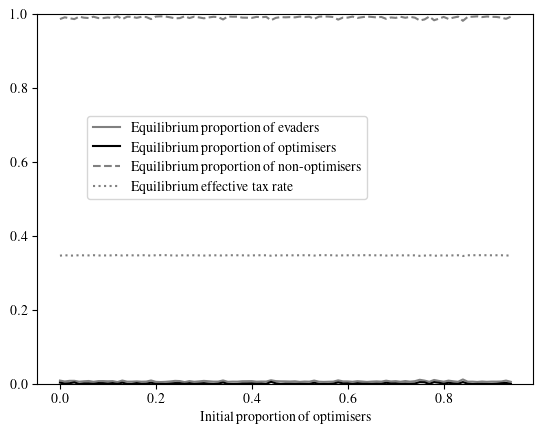

In [10]:
evaderlist = []
avoiderlist = []
honestlist = []
taxrevlist = []
avoiderlow = []
avoiderhigh = []
ialist = []
for ia in np.arange(0,0.95,0.01):
    evaderlist.append(nbscen2_df[(nbscen2_df.initial_avoider >= ia) & (nbscen2_df.initial_avoider < ia + 0.01)]['Number of Evaders'].mean())
    avoiderlist.append(nbscen2_df[(nbscen2_df.initial_avoider >= ia) & (nbscen2_df.initial_avoider < ia + 0.01)]['Number of Avoiders'].mean())
    #calculate confidence interval
    a = nbscen2_df[(nbscen2_df.initial_avoider >= ia) & (nbscen2_df.initial_avoider < ia + 0.01)]['Number of Avoiders'].to_list()
    #avoiderlow.append(sms.DescrStatsW(a).tconfint_mean()[0])
    #avoiderhigh.append(sms.DescrStatsW(a).tconfint_mean()[1])
    honestlist.append(nbscen2_df[(nbscen2_df.initial_avoider >= ia) & (nbscen2_df.initial_avoider < ia + 0.01)]['Number of Honest'].mean())
    taxrevlist.append(nbscen2_df[(nbscen2_df.initial_avoider >= ia) & (nbscen2_df.initial_avoider < ia + 0.01)]['Tax'].mean())
    ialist.append(ia)

plt.plot(ialist, evaderlist, color='gray', label='Equilibrium proportion of evaders')
plt.plot(ialist, avoiderlist, color='black', label='Equilibrium proportion of optimisers')
#plt.plot(ialist, avoiderlow, color='black', linestyle='dotted')
#plt.plot(ialist, avoiderhigh, color='black', linestyle='dotted')
plt.plot(ialist, honestlist, linestyle='dashed', color='gray', label='Equilibrium proportion of non-optimisers')
plt.plot(ialist, taxrevlist, color='gray', linestyle='dotted', label='Equilibrium effective tax rate')
plt.legend(loc=(0.1, 0.5))
plt.xlabel("Initial proportion of optimisers")
#plt.ylabel("Share")
plt.ylim([0,1])
plt.savefig(os.path.join('3_output', 'robustness_inits2.svg'), format = 'svg', dpi=300)

### Scenario 3

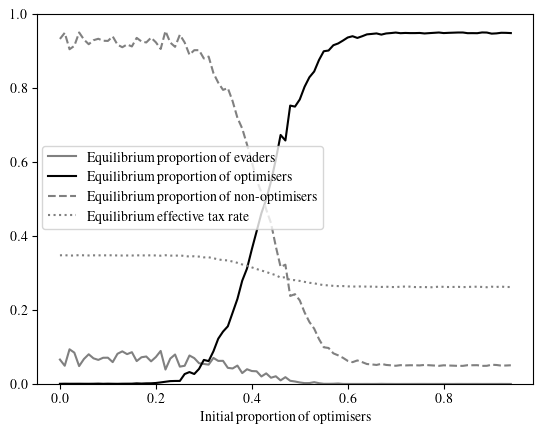

In [11]:
evaderlist = []
avoiderlist = []
honestlist = []
taxrevlist = []
avoiderlow = []
avoiderhigh = []
ialist = []
for ia in np.arange(0,0.95,0.01):
    evaderlist.append(nbscen3_df[(nbscen3_df.initial_avoider >= ia) & (nbscen3_df.initial_avoider < ia + 0.01)]['Number of Evaders'].mean())
    avoiderlist.append(nbscen3_df[(nbscen3_df.initial_avoider >= ia) & (nbscen3_df.initial_avoider < ia + 0.01)]['Number of Avoiders'].mean())
    #calculate confidence interval
    a = nbscen3_df[(nbscen3_df.initial_avoider >= ia) & (nbscen3_df.initial_avoider < ia + 0.01)]['Number of Avoiders'].to_list()
    avoiderlow.append(sms.DescrStatsW(a).tconfint_mean()[0])
    avoiderhigh.append(sms.DescrStatsW(a).tconfint_mean()[1])
    honestlist.append(nbscen3_df[(nbscen3_df.initial_avoider >= ia) & (nbscen3_df.initial_avoider < ia + 0.01)]['Number of Honest'].mean())
    taxrevlist.append(nbscen3_df[(nbscen3_df.initial_avoider >= ia) & (nbscen3_df.initial_avoider < ia + 0.01)]['Tax'].mean())
    ialist.append(ia)

plt.plot(ialist, evaderlist, color='gray', label='Equilibrium proportion of evaders')
plt.plot(ialist, avoiderlist, color='black', label='Equilibrium proportion of optimisers')
#plt.plot(ialist, avoiderlow, color='black', linestyle='dotted')
#plt.plot(ialist, avoiderhigh, color='black', linestyle='dotted')
plt.plot(ialist, honestlist, linestyle='dashed', color='gray', label='Equilibrium proportion of non-optimisers')
plt.plot(ialist, taxrevlist, color='gray', linestyle='dotted', label='Equilibrium effective tax rate')
plt.legend(loc=(0.01, 0.42))
plt.xlabel("Initial proportion of optimisers")
#plt.ylabel("Share")
plt.ylim([0,1])
plt.savefig(os.path.join('3_output', 'robustness_inits3.svg'), format = 'svg', dpi=300)